In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot  as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('datasets\usa_mercedes_benz_prices.csv')
df

,Name,Mileage,Rating,Review Count,Price
0,2021 Mercedes-Benz A-Class A 220 4MATIC,"29,636 mi.",3.9,"1,800","$30,900"
1,2022 Mercedes-Benz AMG SL 63 Base,"5,540 mi.",4.7,"1,239","$139,999"
2,2022 Mercedes-Benz AMG SL 63 Base,"4,890 mi.",4.7,"1,239","$132,999"
3,2020 Mercedes-Benz AMG E 53 Base 4MATIC,"29,746 mi.",4.8,752,"$58,587"
4,2021 Mercedes-Benz AMG GLS 63 Base 4MATIC,"32,631 mi.",5.0,"1,502","$95,990"
...,...,...,...,...,...
2424,2021 Mercedes-Benz E-Class E 450 4MATIC,"54,422 mi.",NaN,236,"$53,490"
2425,2022 Mercedes-Benz S-Class 4MATIC,"11,395 mi.",4.5,"1,334","$89,599"
2426,2021 Mercedes-Benz GLB 250 Base 4MATIC,"30,392 mi.",4.9,"2,375","$32,890"
2427,2023 Mercedes-Benz E-Class E 450 4MATIC,"3,413 mi.",4.8,"1,758","$53,983"


In [3]:
df.shape

(2429, 5)

In [4]:
df.head()

,Name,Mileage,Rating,Review Count,Price
0,2021 Mercedes-Benz A-Class A 220 4MATIC,"29,636 mi.",3.9,"1,800","$30,900"
1,2022 Mercedes-Benz AMG SL 63 Base,"5,540 mi.",4.7,"1,239","$139,999"
2,2022 Mercedes-Benz AMG SL 63 Base,"4,890 mi.",4.7,"1,239","$132,999"
3,2020 Mercedes-Benz AMG E 53 Base 4MATIC,"29,746 mi.",4.8,752,"$58,587"
4,2021 Mercedes-Benz AMG GLS 63 Base 4MATIC,"32,631 mi.",5.0,"1,502","$95,990"


In [5]:
df.drop('Name',axis=1,inplace=True)

In [6]:
df.head()

,Mileage,Rating,Review Count,Price
0,"29,636 mi.",3.9,"1,800","$30,900"
1,"5,540 mi.",4.7,"1,239","$139,999"
2,"4,890 mi.",4.7,"1,239","$132,999"
3,"29,746 mi.",4.8,752,"$58,587"
4,"32,631 mi.",5.0,"1,502","$95,990"


In [7]:
df.isna().sum()

Mileage           0
Rating          294
Review Count     31
Price             0
dtype: int64

In [8]:
df.dtypes

Mileage          object
Rating          float64
Review Count     object
Price            object
dtype: object

In [9]:
df['Review Count'].unique()

array(['1,800 ', '1,239 ', '752 ', '1,502 ', '98 ', '902 ', '344 ',
       '1,594 ', '585 ', '377 ', '899 ', '352 ', '2,166 ', '991 ',
       '1,424 ', '1,050 ', '150 ', '1,948 ', '146 ', '526 ', '1,371 ',
       '2,118 ', '1,094 ', '192 ', '716 ', '483 ', '1,291 ', '94 ',
       '662 ', '37 ', '2,931 ', '2,468 ', '821 ', '33 ', '50 ', '788 ',
       '1,231 ', '15 ', '244 ', '2,891 ', '2,783 ', '419 ', '1,372 ',
       '894 ', '1,491 ', '4,585 ', '1 ', '1,899 ', '112 ', '1,735 ',
       '2,516 ', '819 ', '12 ', '28 ', '79 ', '0 ', '1,411 ', '1,018 ',
       '543 ', '468 ', '2,057 ', '417 ', '274 ', '443 ', '981 ', '696 ',
       '1,354 ', '266 ', '110 ', '316 ', '2,879 ', '527 ', '297 ',
       '2,308 ', '1,915 ', nan, '2,963 ', '862 ', '29 ', '969 ', '1,152 ',
       '843 ', '557 ', '113 ', '2,059 ', '2,506 ', '5,510 ', '911 ',
       '522 ', '1,905 ', '65 ', '184 ', '1,276 ', '318 ', '5,398 ',
       '501 ', '2,375 ', '558 ', '122 ', '848 ', '1,405 ', '322 ', '654 ',
       '1,014 ',

In [10]:
def Review_count_process(item):
    if len(str(item))>3:
        res=int(str(item).replace(',',''))
        return res

In [11]:
df['Review Count']=df['Review Count'].apply(Review_count_process)

In [12]:
df['Review Count'].unique()

array([1800., 1239.,  752., 1502.,   nan,  902.,  344., 1594.,  585.,
        377.,  899.,  352., 2166.,  991., 1424., 1050.,  150., 1948.,
        146.,  526., 1371., 2118., 1094.,  192.,  716.,  483., 1291.,
        662., 2931., 2468.,  821.,  788., 1231.,  244., 2891., 2783.,
        419., 1372.,  894., 1491., 4585., 1899.,  112., 1735., 2516.,
        819., 1411., 1018.,  543.,  468., 2057.,  417.,  274.,  443.,
        981.,  696., 1354.,  266.,  110.,  316., 2879.,  527.,  297.,
       2308., 1915., 2963.,  862.,  969., 1152.,  843.,  557.,  113.,
       2059., 2506., 5510.,  911.,  522., 1905.,  184., 1276.,  318.,
       5398.,  501., 2375.,  558.,  122.,  848., 1405.,  322.,  654.,
       1014., 2339., 4576.,  615.,  295.,  420.,  775.,  977.,  823.,
        348.,  285.,  133.,  129., 3563.,  376., 1847.,  673., 2054.,
       1515.,  471., 2204.,  147.,  203.,  272., 1008., 1248.,  993.,
       1758.,  452., 1096.,  786., 1102.,  949.,  827.,  186., 1838.,
        611., 1661.,

In [13]:
df['Review Count']=df['Review Count'].fillna(df['Review Count'].mean())

In [14]:
df.isna().sum()

Mileage           0
Rating          294
Review Count      0
Price             0
dtype: int64

In [15]:
df.dtypes

Mileage          object
Rating          float64
Review Count    float64
Price            object
dtype: object

In [16]:
df['Rating']=df['Rating'].fillna(df['Rating'].mean())

In [17]:
df.isna().sum()

Mileage         0
Rating          0
Review Count    0
Price           0
dtype: int64

In [18]:
df.duplicated().sum()

32

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.duplicated().sum()

0

In [21]:
df.dtypes

Mileage          object
Rating          float64
Review Count    float64
Price            object
dtype: object

In [22]:
df['Mileage']=df['Mileage'].str.replace(",","").str.replace("mi.","")

    

In [23]:
df['Mileage'].unique()

array(['29636 ', '5540 ', '4890 ', ..., '11395 ', '30392 ', '6336 '],
      dtype=object)

In [24]:
df['Mileage']=df['Mileage'].astype(int)

In [25]:
df['Mileage'].unique()

array([29636,  5540,  4890, ..., 11395, 30392,  6336])

In [26]:
df['Price'].unique()

array(['$30,900', '$139,999', '$132,999', ..., '$89,599', '$32,890',
       '$46,035'], dtype=object)

In [27]:
df['Price']=df['Price'].str.replace("$","").str.replace(",","")


In [28]:
df['Price']=pd.to_numeric(df['Price'],errors='coerce').astype('float64')

In [29]:
df.dtypes

Mileage           int32
Rating          float64
Review Count    float64
Price           float64
dtype: object

In [30]:
df.isna().sum()

Mileage         0
Rating          0
Review Count    0
Price           1
dtype: int64

In [31]:
df['Price']=df['Price'].fillna(df['Price'].mean())

In [32]:
df.isna().sum()

Mileage         0
Rating          0
Review Count    0
Price           0
dtype: int64

<Axes: >

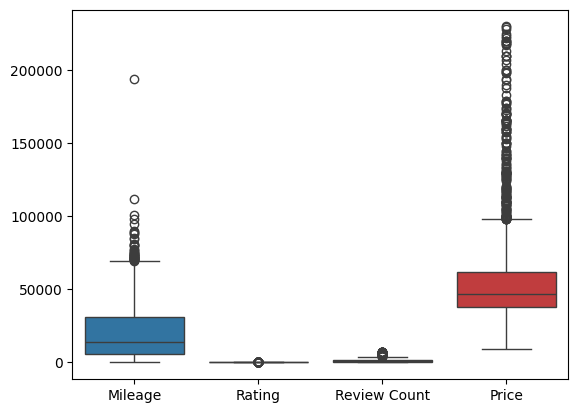

In [33]:
col=['Mileage','Rating','Review Count','Price']
sns.boxplot(df[col])


In [66]:
col=['Mileage','Rating','Review Count','Price']
for col in col:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)

    IQR=Q3-Q1
    lowwer_fence=Q1-1.5*IQR
    upper_fence=Q3+1.5*IQR

    df[col]=np.where(((pd.Series(df[col]))>=upper_fence) | ((pd.Series(df[col]))<=lowwer_fence), df[col].median(),df[col])

    


In [71]:
#Linear Regression 
x=df[['Mileage']]
y=df['Price']
x

,Mileage
0,29636.0
1,5540.0
2,4890.0
3,29746.0
4,32631.0
...,...
2424,54422.0
2425,11395.0
2426,30392.0
2427,3413.0


In [72]:
y

0       30900.0
1       46900.0
2       46900.0
3       58587.0
4       46900.0
         ...   
2424    53490.0
2425    46900.0
2426    32890.0
2427    53983.0
2428    46035.0
Name: Price, Length: 2397, dtype: float64

In [73]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=1)
x_train.shape,x_test.shape

((1605, 1), (792, 1))

In [74]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(x_train)
scaler.transform(x_test)

array([[-1.22895202e-01],
       [-5.77704946e-01],
       [-1.01123065e+00],
       [ 1.32963411e-01],
       [ 5.54850408e-01],
       [-6.28825227e-01],
       [ 1.70135935e+00],
       [-2.14525894e-01],
       [ 9.11213422e-01],
       [ 7.31617266e-01],
       [ 9.16550508e-01],
       [ 1.70380283e+00],
       [-8.59155851e-01],
       [-2.65704468e-02],
       [-3.03584497e-01],
       [ 1.48543243e+00],
       [ 2.97898056e+00],
       [ 6.73423738e-01],
       [-7.32544740e-01],
       [ 6.13108237e-01],
       [-3.96501234e-01],
       [-6.41299862e-01],
       [ 3.44582083e-01],
       [ 1.91544554e-03],
       [-8.63012183e-03],
       [-1.04228863e+00],
       [-7.38396244e-01],
       [-2.43912018e-01],
       [ 1.24024798e+00],
       [-1.20703097e+00],
       [-6.31204410e-01],
       [-5.00992374e-01],
       [-1.13822757e+00],
       [ 1.09505353e+00],
       [ 2.47607274e+00],
       [-6.15450361e-01],
       [ 2.36361413e-01],
       [-4.64147190e-01],
       [ 4.1

In [75]:
from sklearn.linear_model import LinearRegression
lg=LinearRegression()
lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)
y_pred

array([47103.92185566, 49118.82268466, 51039.43082676, 45970.41550777,
       44101.36922769, 49345.2960565 , 39022.09851073, 47509.86469198,
       42522.60768459, 43318.25564379, 42498.96329483, 39011.27336843,
       50365.70815454, 46677.18335123, 47904.41264167, 39978.69924363,
       33361.97344763, 43576.06495388, 49804.79486   , 43843.27504544,
       48316.05292131, 49400.56125667, 45032.90120999, 46550.98498176,
       46597.70401696, 51177.02408286, 49830.71822709, 47640.05127177,
       41064.91681198, 51906.86657175, 49355.83632664, 48778.97019081,
       51602.0533543 , 41708.15816245, 35589.95865668, 49286.042646  ,
       45512.3410651 , 48615.73843978, 44722.10567706, 46574.05962719,
       51087.28935062, 49260.68902324, 43978.58932421, 50362.28968855,
       49313.39037393, 43211.99832593, 42561.63517131, 50022.4371947 ,
       50037.25054733, 47786.47556501, 47320.13982953, 48914.28446958,
       42403.53111927, 43151.32055461, 38530.97889682, 41807.8634205 ,
      

In [76]:
lg.coef_

array([-0.28487217])

In [77]:
lg.intercept_

51935.353788330605

In [78]:
from sklearn.metrics import r2_score,mean_absolute_error
r2_score(y_test,y_pred)

0.13530860678152712

In [79]:
mean_absolute_error(y_test,y_pred)

9147.288018677204

In [80]:
#Multiple Linear Regression
x=df.drop('Price',axis=1)
y=df['Price']
x

,Mileage,Rating,Review Count
0,29636.0,4.600000,1800.0
1,5540.0,4.700000,1239.0
2,4890.0,4.700000,1239.0
3,29746.0,4.800000,752.0
4,32631.0,5.000000,1502.0
...,...,...,...
2424,54422.0,4.533724,236.0
2425,11395.0,4.500000,1334.0
2426,30392.0,4.900000,2375.0
2427,3413.0,4.800000,1758.0


In [81]:
y

0       30900.0
1       46900.0
2       46900.0
3       58587.0
4       46900.0
         ...   
2424    53490.0
2425    46900.0
2426    32890.0
2427    53983.0
2428    46035.0
Name: Price, Length: 2397, dtype: float64

In [82]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=1)
x_train.shape,x_test.shape

((1605, 3), (792, 3))

In [83]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(x_train)
scaler.transform(x_test)

array([[-0.1228952 , -0.47886704,  0.47164635],
       [-0.57770495, -0.65909458,  2.13960719],
       [-1.01123065,  0.40975486,  0.31278202],
       ...,
       [-1.07508277, -0.12466986, -1.2798348 ],
       [ 0.2932689 , -1.1935193 ,  1.12685796],
       [-0.41977864, -0.65909458,  2.13960719]])

In [51]:
from sklearn.linear_model import LinearRegression
mlg=LinearRegression()
mlg.fit(x_train,y_train)
y_pred=mlg.predict(x_test)
y_pred

array([49422.46387061, 52503.76386319, 54938.80824658, 47501.41065733,
       45855.71241073, 51761.76549702, 40210.2277023 , 49824.94135409,
       43866.06534026, 44797.73692042, 44281.49574233, 40288.19993339,
       53016.4212258 , 48359.86081899, 51123.99870407, 40850.90994721,
       33135.11765709, 44502.40310499, 52359.61444408, 45620.70020481,
       50556.56341356, 51590.17143407, 46704.50426756, 48774.99715486,
       48730.42060074, 53479.46450086, 52333.47607112, 49371.64128765,
       42010.54438263, 55564.37405768, 52357.08138132, 50566.40471416,
       56403.78832792, 43168.96357357, 35406.09922287, 51977.63906001,
       47354.04437984, 50363.68903209, 46698.17421376, 48802.01663141,
       54086.82609951, 51722.48851566, 45390.9050845 , 52903.42604765,
       52087.58646975, 45443.96470094, 43376.27552901, 52753.74307963,
       52497.19984058, 49775.98907198, 49466.23616388, 51007.09491165,
       43494.87590091, 45311.98379054, 38703.12037031, 42732.57494708,
      

In [84]:
mlg.coef_

array([-3.33573785e-01, -4.83988837e+02,  6.83303613e-01])

In [53]:
mlg.intercept_

56295.41423270697

In [85]:
from sklearn.metrics import r2_score,mean_absolute_error
r2_score(y_test,y_pred)

0.13530860678152712

In [86]:
mean_absolute_error(y_test,y_pred)

9147.288018677204

In [87]:
#Ridge Regression 
from sklearn.linear_model import Ridge
R_mlr=Ridge(alpha=0.1)
R_mlr.fit(x_train,y_train)

for i,col_name in enumerate(x_train.columns):
    print(f"the coefficient for {col_name} is {R_mlr.coef_[i]}")

the coefficient for Mileage is -0.2848898899282853
the coefficient for Rating is -20.491459388337912
the coefficient for Review Count is 0.5339979340558558


In [88]:
#For ridge regressio evaluation
y_pred=R_mlr.predict(x_test)
r2_score(y_test,y_pred)

0.135460904710327

In [89]:
mean_absolute_error(y_test,y_pred)

9139.386583700398

In [90]:
#Lasso Regression 
from sklearn.linear_model import Lasso
L_mlr=Lasso(alpha=0.1)
L_mlr.fit(x_train,y_train)

for i,col_name in enumerate(x_train.columns):
    print(f"the coefficient for {col_name} is {L_mlr.coef_[i]}")

the coefficient for Mileage is -0.28489040778794006
the coefficient for Rating is -17.573999051193226
the coefficient for Review Count is 0.5338368868411378


In [91]:
#For lasso regressio evaluation
y_pred=L_mlr.predict(x_test)
r2_score(y_test,y_pred)

0.1354606911889693

In [92]:
mean_absolute_error(y_test,y_pred)

9139.404516331897

In [62]:
#Elastic Regression 
from sklearn.linear_model import ElasticNet
Elasticnet_mlr=Lasso(alpha=0.01)
Elasticnet_mlr.fit(x_train,y_train)

for i,col_name in enumerate(x_train.columns):
    print(f"the coefficient for {col_name} is {Elasticnet_mlr.coef_[i]}")

the coefficient for Mileage is -0.333573923859099
the coefficient for Rating is -483.81660776578286
the coefficient for Review Count is 0.6833013763827496


In [93]:
#For ElasticNet regressio evaluation
y_pred=Elasticnet_mlr.predict(x_test)
r2_score(y_test,y_pred)

0.11852231332705154

In [94]:
mean_absolute_error(y_test,y_pred)

9588.36680633833